<a href="https://colab.research.google.com/github/muhajirakbarhsb/NLP_class_2023/blob/main/Week_class_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('data_clean_all.csv')
df

,at,content,score,userName,contentp,contentp_clean
0,2023-10-06 10:07:21,"makin sini makin parah , Lola, mahal",1,MIFTAHUDDIN JUHDI,makin sini makin parah lola mahal,makin sini makin parah lambat mahal
1,2023-10-06 07:27:57,Makin hari paket nya makin mahal,1,Fandi Rahmadi,makin hari paket nya makin mahal,makin hari paket nya makin mahal
2,2023-10-06 06:12:55,"Semua saran sudah kami lakukan, hasilnya tetap...",1,Jimmy Jimmy,semua saran sudah kami lakukan hasilnya tetap ...,semua saran kami laku hasil tetap lambat sisa ...
3,2023-10-06 04:12:21,Aplikasi yang baik,5,Princess Khan,aplikasi yang baik,aplikasi baik
4,2023-10-05 15:41:08,"Siapa yang menyesal beli modem ini,🙋🙋🙋 aku aku...",1,PETER 65,siapa yang menyesal beli modem ini aku aku aku...,siapa sesal beli modem aku aku aku paket nya m...
...,...,...,...,...,...,...
3183,2023-01-01 08:28:28,Internet jelek,1,Rafael,internet jelek,internet jelek
3184,2023-01-01 07:54:02,Pilihan Menu pembelian paket nya gak ada.. gan...,5,Rahmat Samsudin,pilihan menu pembelian paket nya gak ada gangg...,pilih menu beli paket nya ada ganggu
3185,2023-01-01 06:10:55,Sekarang gak bisa beli kuota 100gb... cuma ada...,1,aby habibie,sekarang gak bisa beli kuota gb cuma ada gb gb...,sekarang bisa beli kuota gb cuma gb gb buat ap...
3186,2023-01-01 02:48:24,Saya sudah pakai orbit hampir 1thn tapi kemari...,5,Azkayrah Zahwa,saya sudah pakai orbit hampir thn tapi kemarin...,pakai orbit hampir thn kemarin mau sambung hp ...


In [16]:
df['label'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))

In [17]:
df = df[['contentp_clean',  'label']]
df = df.dropna()
df.head(3)

,contentp_clean,label
0,makin sini makin parah lambat mahal,negative
1,makin hari paket nya makin mahal,negative
2,semua saran kami laku hasil tetap lambat sisa ...,negative


In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1959265954571744229
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2757568315235613783
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [19]:
import tensorflow
sess = tensorflow.compat.v1.Session(config=tensorflow.compat.v1.ConfigProto(log_device_placement=True))
sess

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [21]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re,string


from nltk.probability import FreqDist



from wordcloud import WordCloud



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
df['word_length'] = [len(word_tokenize(x)) for x in df['contentp_clean']]
df

,contentp_clean,label,word_length
0,makin sini makin parah lambat mahal,negative,6
1,makin hari paket nya makin mahal,negative,6
2,semua saran kami laku hasil tetap lambat sisa ...,negative,10
3,aplikasi baik,positive,2
4,siapa sesal beli modem aku aku aku paket nya m...,negative,12
...,...,...,...
3183,internet jelek,negative,2
3184,pilih menu beli paket nya ada ganggu,positive,7
3185,sekarang bisa beli kuota gb cuma gb gb buat ap...,negative,14
3186,pakai orbit hampir thn kemarin mau sambung hp ...,positive,18


Text(0, 0.5, 'Frequency')

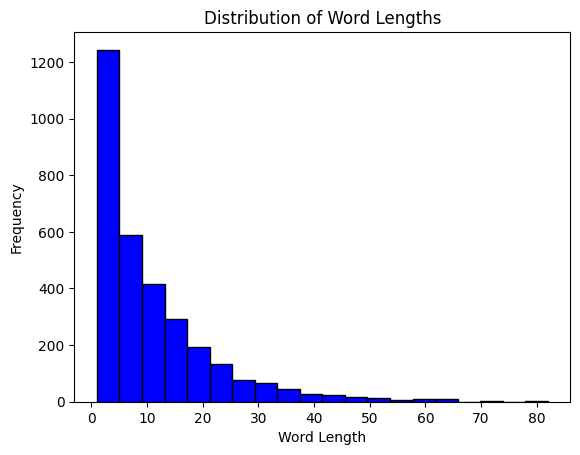

In [24]:
word_lengths = df['word_length']

# Create a histogram
plt.hist(word_lengths, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')

In [23]:
pd.value_counts(df["label"])

negative    1715
positive    1223
neutral      228
Name: label, dtype: int64

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import pickle

In [26]:
#split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.contentp_clean,df.label, test_size=0.3, random_state=42)
corpus = df["contentp_clean"]

In [27]:
max_words = 512
max_len = 128
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(corpus)

# saving
with open('tokenizer_symp.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
# loading
with open('tokenizer_symp.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

sequences = tokenizer.texts_to_sequences(x_train)
X_train = sequence.pad_sequences(sequences,maxlen=max_len)

sequences = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(sequences,maxlen=max_len)

In [29]:
X_train

array([[  0,   0,   0, ...,  54,  75,  15],
       [  0,   0,   0, ...,  81,  76, 135],
       [  0,   0,   0, ..., 379, 379, 104],
       ...,
       [  0,   0,   0, ..., 378,  21,  71],
       [  0,   0,   0, ..., 348,  25,  39],
       [  0,   0,   0, ...,   0,   0,  45]], dtype=int32)

In [33]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [34]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [37]:
y_test.shape

(950, 3)

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# from tensorflow.keras.layers import SimpleRNN

# model = keras.Sequential()
# model.add(layers.Embedding(max_words, 100, input_length=max_len))
# model.add(SimpleRNN(64))  # Use SimpleRNN instead of LSTM
# model.add(layers.Dropout(0.25))
# model.add(layers.Dense(3, activation='softmax'))

In [39]:
model = keras.Sequential()
model.add(layers.Embedding(max_words, 100, input_length=max_len))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(3, activation='softmax'))

- model.add(layers.Embedding(max_words, 100, input_length=max_len)): This line adds an embedding layer to the model. The embedding layer is used to convert integer-encoded words into dense vectors of fixed size. Here's what each argument means:
max_words: The first argument specifies the size of the vocabulary, i.e., the maximum integer index that can be used for word embeddings.
100: The second argument specifies the dimensionality of the word embeddings. Each word in the vocabulary will be represented as a 100-dimensional vector.
input_length=max_len: The third argument specifies the length of the input sequences. If you're working with sequences of fixed length, this argument can be set to that fixed length.

- model.add(layers.LSTM(64)): This line adds a Long Short-Term Memory (LSTM) layer to the model. LSTM is a type of recurrent neural network (RNN) that is well-suited for sequence modeling tasks. The 64 specifies the number of LSTM units or cells in this layer.

- model.add(layers.Dropout(0.25)): This line adds a dropout layer. Dropout is a regularization technique that helps prevent overfitting. The 0.25 argument specifies the dropout rate, which is the fraction of input units to drop during training.

- model.add(layers.Dense(3, activation='softmax'): This line adds a fully connected (dense) layer to the model. The 3 specifies the number of units in this layer, and 'softmax' is the activation function used in this layer. The softmax activation function is commonly used for multi-class classification tasks as it computes the probability distribution over multiple classes.


In summary, the code defines a sequential neural network model for natural language processing. It starts with an embedding layer for word embeddings, followed by an LSTM layer for sequence modeling, a dropout layer for regularization, and ends with a dense layer for classification into 3 classes using a softmax activation function. This model is suitable for text classification tasks with sequences of words.

In [43]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [44]:
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          51200     
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 93635 (365.76 KB)
Trainable params: 93635 (365.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
history = model.fit(X_train, y_train, batch_size=64, epochs=15,
          callbacks = [ModelCheckpoint(filepath='symp_lstm.h5', monitor='val_accuracy', mode='max', save_best_only=True)],
          validation_split=0.2)

Epoch 1/15
28/28 [==============================] - 8s 184ms/step - loss: 0.3998 - accuracy: 0.8550 - val_loss: 0.6060 - val_accuracy: 0.7973
Epoch 2/15
 1/28 [>.............................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 3s 94ms/step - loss: 0.3702 - accuracy: 0.8646 - val_loss: 0.6215 - val_accuracy: 0.7950
Epoch 3/15
28/28 [==============================] - 3s 100ms/step - loss: 0.3530 - accuracy: 0.8742 - val_loss: 0.6929 - val_accuracy: 0.7905
Epoch 4/15
28/28 [==============================] - 2s 50ms/step - loss: 0.3394 - accuracy: 0.8770 - val_loss: 0.6800 - val_accuracy: 0.7928
Epoch 5/15
28/28 [==============================] - 2s 59ms/step - loss: 0.3153 - accuracy: 0.8815 - val_loss: 0.7317 - val_accuracy: 0.7905
Epoch 6/15
28/28 [==============================] - 2s 68ms/step - loss: 0.3032 - accuracy: 0.8956 - val_loss: 0.7245 - val_accuracy: 0.7838
Epoch 7/15
28/28 [==============================] - 1s 21ms/step - loss: 0.2977 - accuracy: 0.8962 - val_loss: 0.7504 - val_accuracy: 0.7883
Epoch 8/15
28/28 [==============================] - 1s 25ms/step - loss: 0.2831 - accuracy: 0.9024 - val_loss: 0.8268 - val_accuracy: 0.7860
Epoch 9/15
28/28 [=====

In [46]:
import keras

In [47]:
reconstructed_model = keras.models.load_model("symp_lstm.h5")
prediksi = reconstructed_model.predict(X_test)
y_pred = np.argmax(prediksi, -1)
y_pred = label_encoder.inverse_transform(y_pred)

30/30 [==============================] - 1s 5ms/step


In [48]:
y_pred

array(['negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negati

In [49]:
y_test = np.argmax(y_test, -1)
y_test = label_encoder.inverse_transform(y_test)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.87      0.83       510
     neutral       0.00      0.00      0.00        78
    positive       0.78      0.84      0.81       362

    accuracy                           0.79       950
   macro avg       0.53      0.57      0.55       950
weighted avg       0.72      0.79      0.76       950



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
def predict_text(input_text, model, tokenizer, label_encoder, max_len):
    # Preprocess the input text
    input_sequence = tokenizer.texts_to_sequences([input_text])
    input_sequence = sequence.pad_sequences(input_sequence, maxlen=max_len)

    # Make predictions using the model
    predictions = model.predict(input_sequence)
    predicted_label_idx = np.argmax(predictions, -1)
    predicted_label = label_encoder.inverse_transform(predicted_label_idx)

    return predicted_label[0]

# Get user input
user_input = input("Enter a text: ")

# Make predictions
predicted_label = predict_text(user_input, reconstructed_model, tokenizer, label_encoder, max_len)
print(f"Predicted Label: {predicted_label}")

Enter a text: jaringan sangat jelek 
1/1 [==============================] - 0s 21ms/step
Predicted Label: negative


In [52]:
# Get user input
user_input = input("Enter a text: ")

# Make predictions
predicted_label = predict_text(user_input, reconstructed_model, tokenizer, label_encoder, max_len)
print(f"Predicted Label: {predicted_label}")

Enter a text: jaringan bagus sekali harga murah
1/1 [==============================] - 0s 21ms/step
Predicted Label: positive
